In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
eigfilepath= '../final/data/weekday/total_flow_weekday_eigenvectors.pivot_2009_grouping_pca_tmp.csv'
meanvecpath= '../final/data/weekday/total_flow_weekday_mean_vector.pivot_2009_grouping_pca_tmp.csv'

m_eigs = pd.read_csv(eigfilepath, header=None).values
m_eigs_t = m_eigs.T
m_mean_vector = pd.read_csv(meanvecpath, header=None).values[0]


In [3]:
%pwd

u'/Users/cjstev/Documents/DSE_Cohort2_Traffic_Capstone/C2 Exploratory'

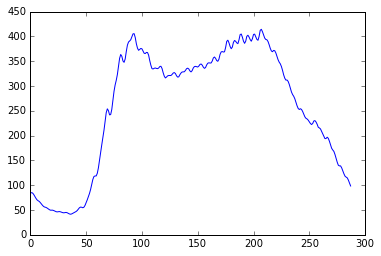

In [4]:
plt.plot(m_mean_vector)

In [5]:
smoothed = np.mean(m_mean_vector.reshape(-1, 12), axis=1) 

In [6]:
smoothed = np.append(smoothed,smoothed[0])

In [7]:
#interpolate 11 pts beteween each
long_smoothed = np.array([])
for i,elem in enumerate(smoothed[:-1]):
    start = elem
    end = smoothed[i+1]
    m = (end-start)/12
    b = start
    interp = [m*x+b for x in range(12)]
    long_smoothed = np.append(long_smoothed,interp)

i=-6
long_smoothed=np.append(long_smoothed[i:],long_smoothed[:i]) #adjust for midpoints of mean above

diff = m_mean_vector-long_smoothed # fine magnitude of wiggles
diff = diff/np.sqrt(sum([i**2 for i in diff])) # Normalize vector

print sum([i**2 for i in diff]) # ensure length 1

1.0


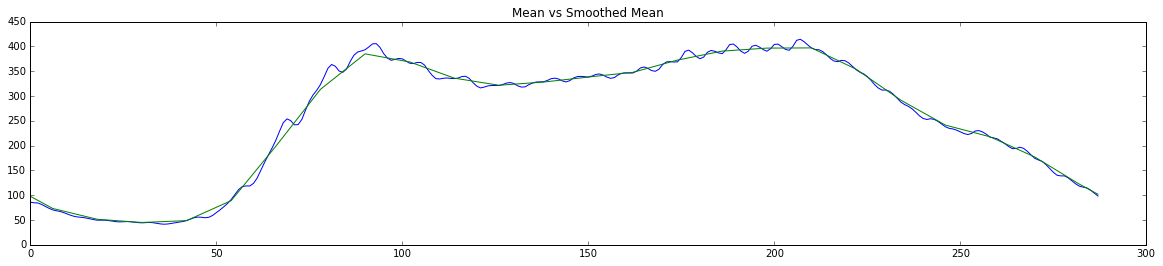

In [8]:
plt.figure(figsize = (20,4))
plt.title('Mean vs Smoothed Mean')
plt.plot(m_mean_vector)
plt.plot(long_smoothed)
plt.show()

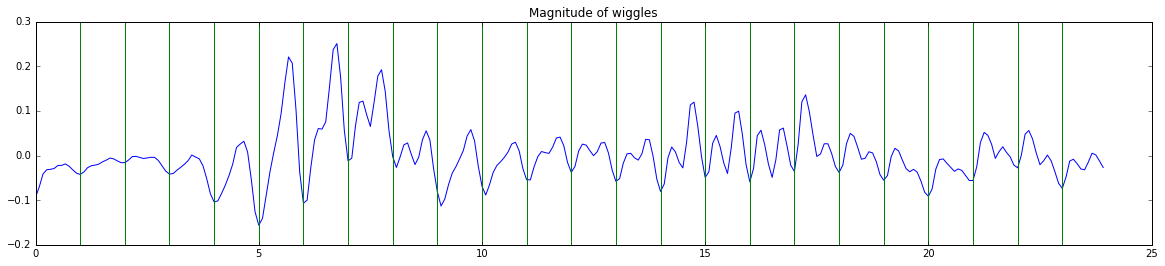

In [9]:
plt.figure(figsize = (20,4))
x_vals = [i/12.0 for i in range(288)]
plt.plot(x_vals,list(diff))
plt.title("Magnitude of wiggles")
for i in range(24):
    plt.axvline(x=i, linewidth=1, color='g')
plt.show()

In [10]:
pd.read_csv?

## Read in data and pivot for projection

In [11]:
df = pd.read_csv("../I15S_data2.csv", usecols = ['Date','Time','index','TotalFlow'])
df = df[['Date','Time','index','TotalFlow']]
df=df.sort_values(['Date','Time','index'])
data = df.as_matrix()

In [12]:
rows, row_pos = np.unique(data[:, 1], return_inverse=True) #Time
cols, col_pos = np.unique(data[:, 2], return_inverse=True)
depth, depth_pos = np.unique(data[:, 0], return_inverse=True) 

pivot_table = np.zeros((len(rows), len(cols), len(depth)), dtype=data.dtype)
pivot_table[row_pos, col_pos, depth_pos] = data[:, 3]

In [13]:
a = pivot_table; # example of what real input will look like

# create 2D flattened version of 3D input array
d1,d2,d3 = a.shape
b = np.zeros([d1,d2*d3])
for i in range(len(a)):
    b[i] = a[i].flatten()


### Project I15S flow onto wiggles 

In [14]:
b.shape, diff.shape

((288, 24455), (288,))

In [15]:
wiggle_coefs = np.dot(b.transpose(),diff)

In [16]:
wiggle_coefs

array([ 104.51773081,  676.20645929,  220.78949344, ...,  401.30475365,
        452.23456011,  263.44735617])

In [17]:
top_5_wiggles = wiggle_coefs.argsort()[-6:][::-1]

In [18]:
bottom_5_wiggles = wiggle_coefs.argsort()[:6][::-1]

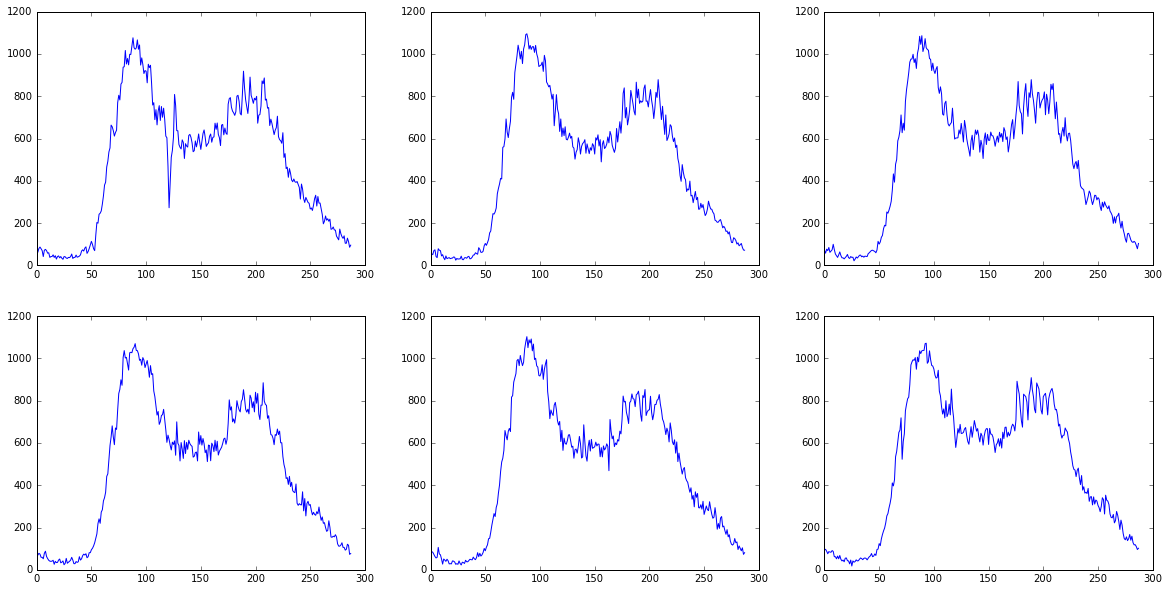

In [19]:
fig = plt.figure(figsize = (20,10))
for i,j in enumerate(top_5_wiggles):
    ax = fig.add_subplot(2, 3, i+1)
    plt.plot(b[:,j])
plt.show()

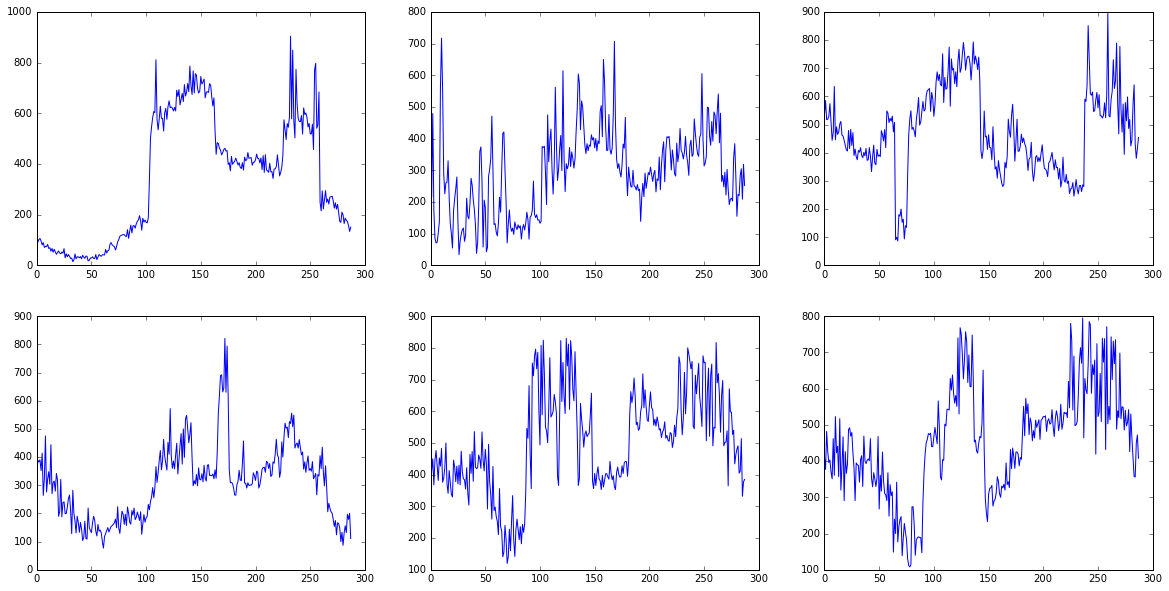

In [20]:
fig = plt.figure(figsize = (20,10))
for i,j in enumerate(bottom_5_wiggles):
    ax = fig.add_subplot(2, 3, i+1)
    plt.plot(b[:,j])
plt.show()